# Game of Life

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 6

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

For the animations in this notebook to work, you might have to install
ffmpeg.  On Ubuntu and Linux Mint, the following should do it:

    sudo add-apt-repository ppa:mc3man/trusty-media
    sudo apt-get update
    sudo apt-get install ffmpeg
    
If you have instructions for other operating systems, please let me know and I will add them here.

In [122]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

import thinkplot

from matplotlib import rc
rc('animation', html='html5')

## Game of Life entities

In [2]:
from Life import Life, LifeViewer

def make_viewer(n, m, row, col, *strings):
    """Makes a Life and LifeViewer object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    viewer = LifeViewer(life)
    return viewer

A beehive is a stable entity, also called a "still life"

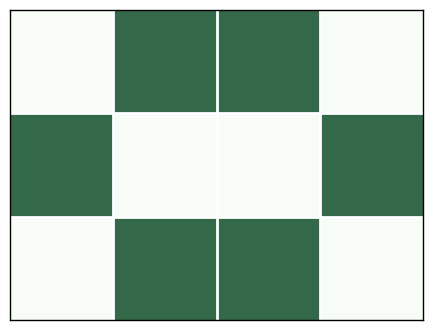

In [3]:
# beehive
viewer = make_viewer(3, 4, 0, 0, '0110', '1001', '0110')
viewer.draw(grid=True)
plt.savefig('chap06-1.pdf')

Here's what it looks like after one step:

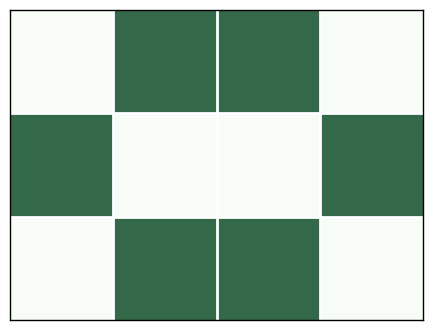

In [4]:
viewer.step()
viewer.draw(grid=True)

A toad is an oscillator with period 2.  Here's are its two configurations:

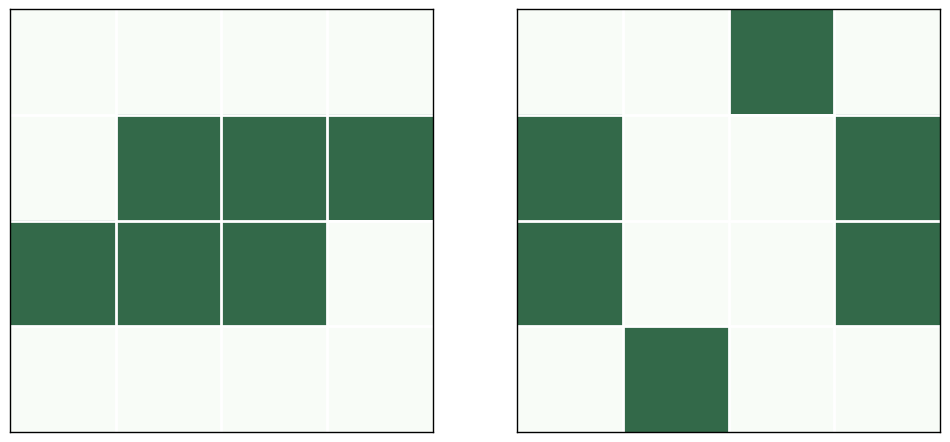

In [5]:
# toad
thinkplot.preplot(cols=2)
viewer = make_viewer(4, 4, 1, 0, '0111', '1110')
viewer.draw(grid=True)

thinkplot.subplot(2)
viewer.step()
viewer.draw(grid=True)

plt.savefig('chap06-2.pdf')

Here's what it looks like as an animation.

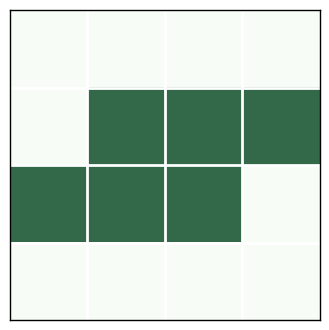

In [6]:
viewer.step()
anim = viewer.animate(frames=4, interval=400, grid=True)

If the following cell yields a RuntimeError with a message like "No MovieWriters available", you probably need to install ffmpeg.  See instructions at the top of this notebook.

In [7]:
anim

A glider is a spaceship that translates one unit down and to the right with period 4. 

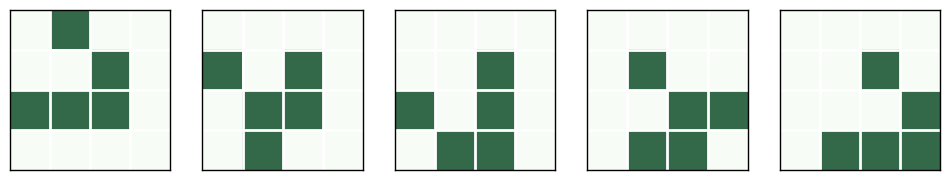

In [8]:
# glider
glider = ['010', '001', '111']

thinkplot.preplot(cols=5)
viewer = make_viewer(4, 4, 0, 0, *glider)
viewer.draw(grid=True)

for i in range(2, 6):
    viewer.step()
    thinkplot.subplot(i)
    viewer.draw(grid=True)
    
plt.savefig('chap06-3.pdf')

Here's an animation showing glider movement.

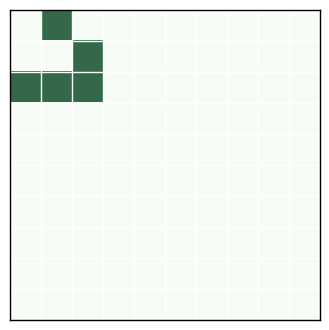

In [9]:
viewer = make_viewer(10, 10, 0, 0, '010', '001', '111')
anim = viewer.animate(frames=32, interval=200, grid=True)

In [10]:
anim

The r-pentomino starts with only five live cells, but it runs for 1103 steps before stabilizing.

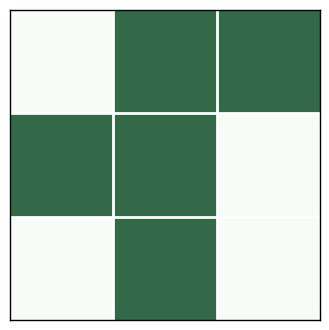

In [11]:
# r pentomino
rpent = ['011', '110', '010']

viewer = make_viewer(3, 3, 0, 0, *rpent)
viewer.draw(grid=True)

Here are the start and finish configurations.

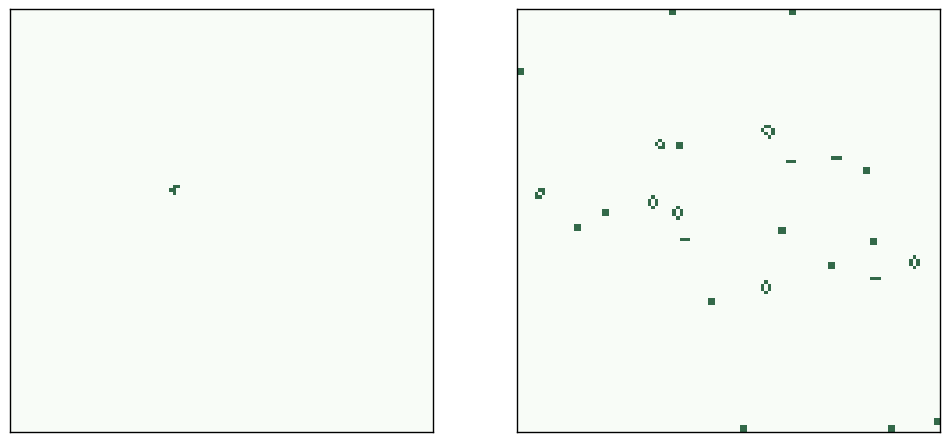

In [12]:
# r pentomino
rpent = ['011', '110', '010']

thinkplot.preplot(cols=2)
viewer = make_viewer(120, 120, 50, 45, *rpent)
viewer.draw()

for i in range(1103):
    viewer.step()

thinkplot.subplot(2)
viewer.draw()
plt.savefig('chap06-4.pdf')

And here's the animation that shows the steps.

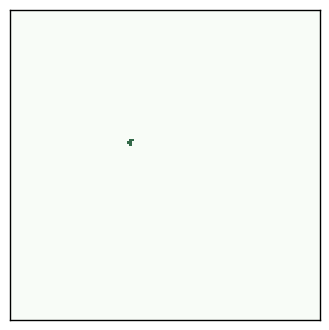

In [13]:
viewer = make_viewer(120, 120, 50, 45, *rpent)
anim = viewer.animate(frames=1200, interval=10)

In [14]:
anim

### Conway's conjecture

Gosper's glider gun was the first entity to be discovered that produces an unbounded number of live cells, which refutes Conway's conjecture.

In [15]:
glider_gun = [
    '000000000000000000000000100000000000',
    '000000000000000000000010100000000000',
    '000000000000110000001100000000000011',
    '000000000001000100001100000000000011',
    '110000000010000010001100000000000000',
    '110000000010001011000010100000000000',
    '000000000010000010000000100000000000',
    '000000000001000100000000000000000000',
    '000000000000110000000000000000000000'
]

Here's the initial configuration:

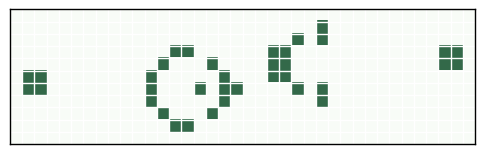

In [16]:
viewer = make_viewer(11, 38, 1, 1, *glider_gun)
viewer.draw(grid=True)
plt.savefig('chap06-5.pdf')

And here's what it looks like running:

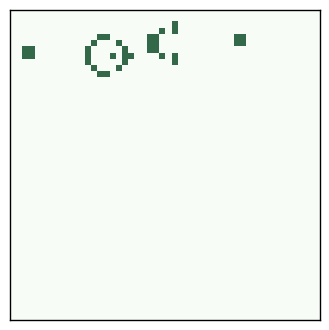

In [17]:
viewer = make_viewer(50, 50, 2, 2, *glider_gun)
anim = viewer.animate(frames=500, interval=20)

In [18]:
anim

### Implementing Game of Life

As an example, I'll start with an array of random cells:

In [19]:
a = np.random.randint(2, size=(10, 10)).astype(np.uint8)
print(a)

[[1 1 0 0 0 1 0 0 1 0]
 [1 0 1 1 0 1 0 0 0 0]
 [1 1 0 0 1 0 0 1 1 1]
 [0 0 0 1 0 1 1 0 1 1]
 [0 0 0 0 1 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [0 1 0 1 1 0 1 0 1 1]
 [1 1 1 0 1 0 1 1 1 1]
 [0 0 1 1 0 0 0 0 0 1]
 [1 1 0 0 1 0 0 0 0 1]]


The following is a straightforward translation of the GoL rules using `for` loops and array slicing.

In [20]:
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

print(b)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 1 1 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Here's a smaller, faster version using cross correlation.

In [21]:
from scipy.signal import correlate2d

kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==2) & a
b = b.astype(np.uint8)
print(b)

[[1 1 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 1 0 1]
 [0 0 0 1 1 0 1 0 0 1]
 [0 0 0 1 1 0 1 0 0 0]
 [1 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 1 0 1]
 [0 1 1 1 0 0 0 0 0 0]]


Using a kernel that gives a weight of 10 to the center cell, we can simplify the logic a little.

In [22]:
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==12) | (c==13)
b = b.astype(np.uint8)
print(b)

[[1 1 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 1 0 1]
 [0 0 0 1 1 0 1 0 0 1]
 [0 0 0 1 1 0 1 0 0 0]
 [1 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 1 0 1]
 [0 1 1 1 0 0 0 0 0 0]]


More importantly, the second version of the kernel makes it possible to use a look up table to get the next state, which is faster and even more concise.

In [23]:
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1
c = correlate2d(a, kernel, mode='same')
b = table[c]
print(b)

[[1 1 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 1 0 1]
 [0 0 0 1 1 0 1 0 0 1]
 [0 0 0 1 1 0 1 0 0 0]
 [1 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 1 0 1]
 [0 1 1 1 0 0 0 0 0 0]]


**Exercise:**  Start GoL in a random state and run it until it stabilizes.
What stable patterns can you identify?

['0100011010', '0101100110', '1100010111', '0000101011', '1011101010', '0110001011', '1000100101', '1111001011', '1001101000', '1001101011']


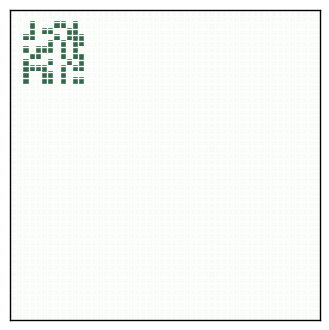

In [24]:
a = np.random.randint(2, size=(10, 10)).astype(np.uint8)
string_array = []

for row in a:
    string_array.append(''.join(map(str, row)))

print(string_array)

viewer = make_viewer(50, 50, 2, 2, *string_array)
viewer.draw(grid=True)
plt.savefig('chap06-5.pdf')

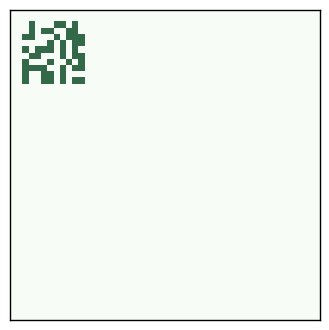

In [25]:
anim = viewer.animate(frames=200, interval=20)

In [26]:
anim

**Exercise:** Many Game of Life patterns are available in portable file formats.  For one source, see http://www.conwaylife.com/wiki/Main_Page.

Write a function to parse one of these formats and initialize the array.

In [30]:
import pprint

In [27]:
# Adapted from https://codereview.stackexchange.com/questions/149068/parse-run-length-encoded-file-for-cellular-automaton-data

class RunLengthEncodedParser:
    """
    Parser for Run Length Encode (RLE) strings / files.
    More information: http://www.conwaylife.com/w/index.php?title=Run_Length_Encoded
    """
    def __init__(self, rle_string):
        self.rle_string = rle_string
        self.name = ""
        self._comments = []
        self.author = ""
        self.size_x = 0
        self.size_y = 0
        self.rule_birth = []
        self.rule_survival = []
        self.pattern_raw = ""
        # Fill in instance attributes by parsing the raw strings
        self.populate_attributes(self.rle_string.strip().splitlines())
        self.pattern_2d_array = self.populate_pattern(self.pattern_raw, self.size_x, self.size_y)

    def populate_attributes(self, lines):
        """
        This method performs all the string parsing required to parse the various 
        fields of data into their respective data members.
        """
        for line in lines:
            # Name of the pattern
            if line.startswith("#N"):
                self.name = line.lstrip("#N ")
            # Comments accompanying the pattern
            elif line.startswith("#C") or line.startswith("#c"):
                self._comments.append(line.lstrip("#Cc "))
            # Authorship of the pattern
            elif line.startswith("#O"):
                self.author = line.lstrip("#O ")
            # Grid sizes and rules
            elif line.startswith("x"):
                data = line.split(",")
                for d in data:
                    # Grid sizes
                    if d.strip().startswith("x"):
                        _, x = d.split("=")
                        self.size_x = int(x.strip())
                    elif d.strip().startswith("y"):
                        _, y = d.split("=")
                        self.size_y = int(y.strip())
                    # Rules
                    elif d.strip().startswith("rule"):
                        _, rule = d.split("=")
                        for r in rule.strip().split("/"):
                            if r.startswith("B"):
                                for digit in list(r.lstrip("B")):
                                    self.rule_birth.append(int(digit))
                            if r.startswith("S"):
                                for digit in list(r.lstrip("S")):
                                    self.rule_survival.append(int(digit))
            # Other lines should contain the actual pattern
            else:
                self.pattern_raw += line.strip(" \n\r\t")

    def populate_pattern(self, pattern_raw, size_x, size_y, default_cell='b'):
        pattern = []
        pattern_rows = pattern_raw.rstrip("!").split("$")
        assert len(pattern_rows) == size_y, \
        "Number of data rows {0} does not match size y = {1}".format(len(pattern_rows), size_y)
        for y in range(size_y):
            pattern.append([])
            tmp_num_str = ""
            for c in pattern_rows[y]:
                if self.isdigit(c):
                    tmp_num_str += c
                else:
                    if tmp_num_str == "":
                        num_cells = 1
                    else:
                        num_cells = int(tmp_num_str)
                    for n in range(num_cells):
                        pattern[y].append(c)
                    #reset count until another number is encountered
                    tmp_num_str = ""
            #fill in empty spaces at end of each row
            for _ in range(len(pattern[y]), size_x):
                pattern[y].append(default_cell)
        return pattern


    def isdigit(self, c):
        """Returns True is the character is a digit"""
        return '0' <= c <= '9'


    def __str__(self):
        return self.rle_string
    
    def __format__(self, fmt):
        return 'name: {self.name}\n' \
               'comments: {self.comments}\n' \
               'author: {self.author}\n' \
               'size_x: {self.size_x}\n' \
               'size_y: {self.size_y}\n' \
               'rule_birth: {self.rule_birth}\n' \
               'rule_survival: {self.rule_survival}\n' \
               'pattern_raw: {self.pattern_raw}\n' \
               'human_friendly_pattern: {self.human_friendly_pattern}\n'.format(self=self)

    @property
    def human_friendly_pattern(self):
        pattern_str = ""
        for row in self.pattern_2d_array:
            row_str = ""
            for c in row:
                if c == 'b':
                    row_str += '.'
                else:
                    row_str += c
            pattern_str += row_str + '\n'
        return pattern_str

    @property
    def comments(self):
        return pprint.pformat(self._comments)

In [31]:
def parse_rle():
    sample_rle = '#N Gosper glider gun\n' \
    '#C This was the first gun discovered.\n' \
    '#C As its name suggests, it was discovered by Bill Gosper.\n' \
    '#O Bill Gosper Nov. 1970\n' \
    'x = 36, y = 9, rule = B3/S23\n' \
    '4bo$22bobo$12b2o6b2o12b2o$11bo3bo4b2o12b2o$2o8bo5bo3b2o$2o8bo3bob2o4b\n' \
    'obo$10bo5bo7bo$11bo3bo$12b2o!\n'

    rle_parser = RunLengthEncodedParser(sample_rle)
    print(format(rle_parser))
    return rle_parser

In [32]:
rle = parse_rle()

name: Gosper glider gun
comments: ['This was the first gun discovered.',
 'As its name suggests, it was discovered by Bill Gosper.']
author: Bill Gosper Nov. 1970
size_x: 36
size_y: 9
rule_birth: [3]
rule_survival: [2, 3]
pattern_raw: 4bo$22bobo$12b2o6b2o12b2o$11bo3bo4b2o12b2o$2o8bo5bo3b2o$2o8bo3bob2o4bobo$10bo5bo7bo$11bo3bo$12b2o!
human_friendly_pattern: ....o...............................
......................o.o...........
............oo......oo............oo
...........o...o....oo............oo
oo........o.....o...oo..............
oo........o...o.oo....o.o...........
..........o.....o.......o...........
...........o...o....................
............oo......................




In [33]:
for line in rle.pattern_2d_array:
    line_str = ''.join(line)
    print(line_str)

bbbbobbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb
bbbbbbbbbbbbbbbbbbbbbbobobbbbbbbbbbb
bbbbbbbbbbbboobbbbbboobbbbbbbbbbbboo
bbbbbbbbbbbobbbobbbboobbbbbbbbbbbboo
oobbbbbbbbobbbbbobbboobbbbbbbbbbbbbb
oobbbbbbbbobbboboobbbbobobbbbbbbbbbb
bbbbbbbbbbobbbbbobbbbbbbobbbbbbbbbbb
bbbbbbbbbbbobbbobbbbbbbbbbbbbbbbbbbb
bbbbbbbbbbbboobbbbbbbbbbbbbbbbbbbbbb


In [34]:
def read_convert_to_01s(life, rle_read, row, col):
    i = row
    for line_list in rle_read.pattern_2d_array:
        line = ''.join(line_list)
        line = line.replace('o', '1')
        line = line.replace('b', '0')
        life.add_cells(i, col, line)
        print(line)
        i += 1

In [35]:
# Solution

# Here's an example that loads a period 52 oscillator.

n = 37
m = 37
row = 1
col = 1

life = Life(n, m)
read_convert_to_01s(life, rle, row, col)

000010000000000000000000000000000000
000000000000000000000010100000000000
000000000000110000001100000000000011
000000000001000100001100000000000011
110000000010000010001100000000000000
110000000010001011000010100000000000
000000000010000010000000100000000000
000000000001000100000000000000000000
000000000000110000000000000000000000


In [36]:
rle_string = ""
with open('101.rle') as f:
        for line in f:
            rle_string += line
            


In [37]:
rle2 = RunLengthEncodedParser(rle_string)
n = 37
m = 37
row = 1
col = 1

life = Life(n, m)
read_convert_to_01s(life, rle2, row, col)

000011000000110000
000101000000101000
000100000000001000
110100000000001011
110101001100101011
000101010010101000
000101010010101000
110101001100101011
110100000000001011
000100000000001000
000101000000101000
000011000000110000


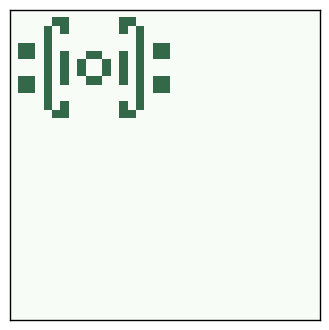

In [38]:
viewer = LifeViewer(life)
anim = viewer.animate(frames=52, interval=100)

In [39]:
anim

**Exercise:** One of the longest-lived small patterns is ``rabbits'', which starts with
9 live cells and takes 17 331 steps to stabilize.  You can get the initial configuration in various formats from http://www.conwaylife.com/wiki/Rabbits.  Load this configuration
and run it.

In [ ]:
# Solution goes here

### Ran it out of LifeRabbits.py on the terminal

**Exercise:** In my implementation, the `Life` class is based on a parent class
called `Cell2D`, and `LifeViewer` is based on `Cell2DViewer`.  You can
use these base classes to implement other 2-D cellular automatons.

For example, one variation of GoL, called ``Highlife'', has the
same rules as GoL, plus one additional rule: a dead cell with 6
neighbors comes to life.

Write a class named `Highlife` that inherits from `Cell2D` and implements
this version of the rules.  Also write a class named `HighlifeViewer`
that inherits from `Cell2DViewer` and try different ways
to visualize the results.  As a simple example, use a different
color map.

One of the more interesting patterns in Highlife is the replicator.
Use `add_cells` to initialize Highlife with a replicator and see what it
does.

In [40]:
from Cell2D import Cell2D, Cell2DViewer

class HighLife(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 6, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]


class HighLifeViewer(Cell2DViewer):
    """Viewer for Game of Life."""
    cmap = plt.get_cmap('Blues')
    options = dict(interpolation='nearest', alpha=0.8,
                   vmin=0, vmax=1)
    

In [41]:
def make_high_viewer(n, m, row, col, *strings):
    """Makes a Life and LifeViewer object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = HighLife(n, m)
    life.add_cells(row, col, *strings)
    viewer = HighLifeViewer(life)
    return viewer

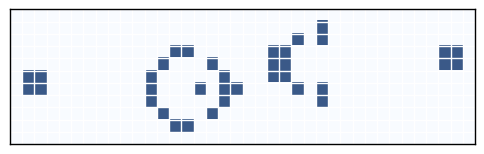

In [42]:
viewer = make_high_viewer(11, 38, 1, 1, *glider_gun)
viewer.draw(grid=True)
plt.savefig('chap06-5.pdf')

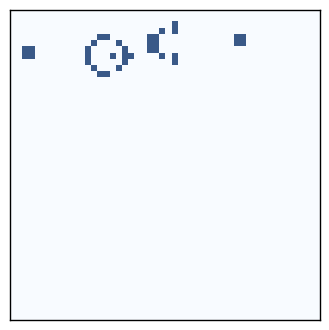

In [43]:
viewer = make_high_viewer(50, 50, 2, 2, *glider_gun)
anim = viewer.animate(frames=200, interval=20)

In [44]:
anim

**Exercise:** 

If you generalize the Turing machine to two dimensions, or
add a read-write head to a 2-D CA, the result is a
cellular automaton called a Turmite.  It is named after a
termite because of the way the read-write head moves, but
spelled wrong as an homage to Alan Turing.

The most famous Turmite is Langton's Ant, discovered by Chris Langton
in 1986.  See http://en.wikipedia.org/wiki/Langton_ant.

The ant is a read-write head with
four states, which you can think of as facing north, south,
east or west.  The cells have two states, black and white.

The rules are simple.  During each time step, the ant checks the color
of the cell it is on.  If black, the ant turns to the right,
changes the cell to white, and moves forward one space.  If the cell
is white, the ant turns left, changes the cell to black, and moves
forward.

Given a simple world, a simple set of rules, and only one moving part,
you might expect to see simple behavior---but you should know
better by now.  Starting with all white cells, Langton's ant
moves in a seemingly random pattern for more than 10 000 steps
before it enters a cycle with a period of 104 steps.  After
each cycle, the ant is translated diagonally, so it leaves
a trail called the "highway".

Write an implementation of Langton's Ant.

In [127]:
""" At a white square, turn 90° right, flip the color of the square, move forward one unit
At a black square, turn 90° left, flip the color of the square, move forward one unit"""

class LangtonAnt(object):
    """ Implementation of Langton's Ant """
    
    def __init__(self, n, m=None, d = 1000):
        """ """
        self.n = n
        self.m = n if m is None else m
        self.d = d
        self.space3d = np.zeros((n,self.m,d))
        self.space = np.zeros((n,self.m))
        self.x = n//2
        self.y = self.m//2
        self.rules = {(0,'N'):(1,(1,0),'E'),
                 (0,'E'):(1,(0,1),'S'),
                 (0,'S'):(1,(-1,0),'W'),
                 (0,'W'):(1,(0,-1),'N'),
                 (1,'N'):(0,(-1,0),'W'),
                 (1,'E'):(0,(0,-1),'N'),
                 (1,'S'):(0,(1,0),'E'),
                 (1,'W'):(0,(0,1),'S'),       
        }
        self.direction = 'N'
        self.current_step = 1
        self.ant_place3d = [(self.x,self.y)]
        self.ant_place = (self.x,self.y)
        self.state = {'N':0,
                     'E':1,
                     'S':2,
                     'W':3}
        
    def loop(self, num_steps):
        for _ in range(num_steps):
            try: self.step()
            except StopIteration: break
                
    def loop_step(self):
        a = self.space3d
        self.space3d[:,:, self.current_step] = self.space3d[:,:, self.current_step-1]
        square_color = int(a[self.x, self.y, self.current_step-1])
        print("Current Place: ", (self.x, self.y), square_color, self.direction)
        new_color, next_step, self.direction = self.rules[square_color, self.direction]
        
        self.space3d[self.x, self.y, self.current_step] = new_color
        print("New Place: ", (self.x, self.y), new_color, self.direction)
        self.move(next_step)
        self.ant_place.append((self.x,self.y))
                
    def move(self, movement):
        """ Moves the current position based on a tuple """
        self.x += movement[0]
        self.y += movement[1]
        self.current_step += 1
        self.ant_place = (self.x, self.y)
        
    def step(self):
        try:
            square_color = self.space[self.ant_place]
        except IndexError:
            sys.exit()  
        new_color, next_step, self.direction = self.rules[square_color, self.direction]
        self.space[self.ant_place] = new_color
        
        self.move(next_step)
        

In [141]:
ant = LangtonAnt(75, 75)

In [155]:
num = 9999

ant.loop(num)

In [156]:
ant.space3d[:,:,-1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [157]:
class AntDrawer(object):
    """ Displays a turing machine in a readable format"""
    
    # Add some class-wide variables
    cmap = plt.get_cmap('Blues')
    options = dict(alpha=0.7, interpolation='nearest')
    
    def __init__(self, ant):
        """ Inputs:
        turing: an instance of Langton's Ant
        n: number of columns in graph
        m: number of rows in graph """
        self.ant = ant
        
    def draw(self, start=0, end=None):
        """Draws the Turing Machine using pyplot.imshow.

        start: index of the first column to be shown
        end: index of the last column to be shown
        """
        a = self.ant.space3d[:,:,-1]
        n, m = a.shape
        xs = list(self.ant.ant_place)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(a, cmap=self.cmap, **self.options)
        plt.plot(xs[0], xs[1], 'ro')

In [158]:
draw = AntDrawer(ant)

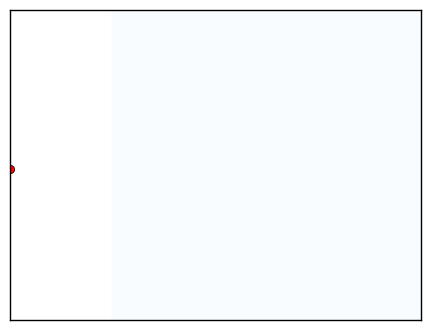

In [159]:
draw.draw()

In [119]:
class AntViewer(Cell2DViewer):
    """Generates an animated view of the grid."""

    cmap = plt.get_cmap('Oranges')

    def __init__(self, viewee):
        Cell2DViewer.__init__(self, viewee)
        self.viewee = viewee
        self.arrow = None

    def draw(self, grid=False):
        """Updates the display with the state of the grid."""
        self.draw_array(self.viewee.space)
        self.draw_arrow()
        if grid:
            self.draw_grid()

    def draw_arrow(self):
        """Draws the arrow."""
        center, angle = self.arrow_specs()
        self.arrow = RegularPolygon(center, 3, color='orange',
                                    radius=0.4, orientation=angle)
        ax = plt.gca()
        ax.add_patch(self.arrow)

    def arrow_specs(self):
        """Computes the center and orientation of the arrow."""
        a = self.viewee.space
        n, m = a.shape
        i, j = self.viewee.ant_place
        center = j+0.5, n-i-0.5
        angle = -np.pi / 2 * self.viewee.state[self.viewee.direction]
        return center, angle

    def animate_func(self, i):
        """Draws one frame of the animation."""
        self.step()

        # update the array
        a = self.viewee.space
        self.im.set_array(a)

        # update the arrow
        center, angle = self.arrow_specs()
        self.arrow.xy = center
        self.arrow.orientation = angle

        return (self.im, self.arrow)

In [142]:
ant_view = AntViewer(ant)

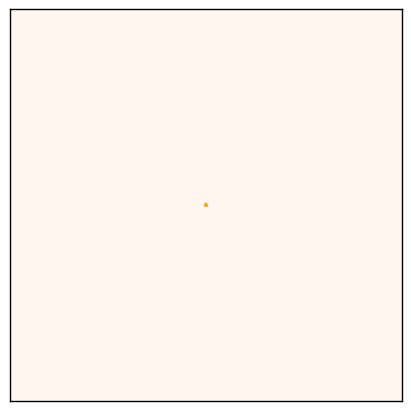

In [143]:
anim = ant_view.animate(frames = 2500, interval = 1)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
plt.show()

In [144]:
anim